> ## Importing libraries

In [1]:
# Standard Libraries
import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Visualisation Libraries
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

In [3]:
# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [5]:
# NLTK and Sklearn
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [6]:
# Spacy
nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


False

In [7]:
# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [8]:
# Building Models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
# Model Evaulation and Scoring
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

## Load in your data from kaggle.  
By working in a kaggle kernel, you can access the data directly from the competition, as well as make your submission without downloading your output file

In [10]:
train = pd.read_csv('../input/climate-change-edsa2020-21/train.csv')
test = pd.read_csv('../input/climate-change-edsa2020-21/test.csv')

# Visualise the loaded datasets
* Viewing the datasets that have been loaded 

In [11]:
print(train.shape) 
print(test.shape)

(15819, 3)
(10546, 2)


In [12]:
display(train.head())
display(test.head())

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# Identifying the Sentiments
* Label sentiments
* Pro = 1
* Neutral = 0
* Anti = -1
* News = 2

In [13]:
# Firstly do a Sentiment count

In [14]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [15]:
def update(df):
    df = train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

In [16]:
df = update(train)
df.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# Cleaning Tweets
* Removing noise from all tweets

In [17]:
def TweetClean(tweet):
    
    # Remove hashtags from the tweet
    tweet = re.sub(r'#\w*', '', tweet) 
    
    # Convert all text to lowercase
    tweet = tweet.lower()
    
    # Remove url's that appear in the tweets
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet) 
    
    # Remove mentions in the tweet
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove any numbers that appear in the tweet
    tweet = re.sub(r'\d+', '', tweet) 
    
    # Remove blackspace from the tweet
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove any punctuation from the Tweet
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet) 
    
    # Remove strange characters from tweet
    tweet = re.sub(r"U+FFFD ", ' ', tweet) 
        
    # Remove blank spaces in front of tweet  
    tweet = tweet.lstrip(' ') 
    
    return tweet

In [18]:
# Cleaning the tweets in the message column

In [19]:
df['message'] = df['message'].apply(TweetClean)
df['message'] = df['message'].apply(TweetClean)

In [20]:
df.head

<bound method NDFrame.head of       sentiment                                            message  tweetid
0           Pro  polyscimajor epa chief doesn t think carbon di...   625221
1           Pro  it s not like we lack evidence of anthropogeni...   126103
2          News  rt researchers say we have three years to act ...   698562
3           Pro  wired was a pivotal year in the war on climate...   573736
4           Pro  rt it s and a racist sexist climate change den...   466954
...         ...                                                ...      ...
15814       Pro  rt they took down the material on global warmi...    22001
15815      News  rt how climate change could be breaking up a -...    17856
15816   Neutral  notiven rt nytimesworld what does trump actual...   384248
15817      Anti  rt hey liberals the climate change crap is a h...   819732
15818   Neutral       rt s climate change equation in screenshots    806319

[15819 rows x 3 columns]>

# Speech Tagging & Lemmatization
* Modifies original train dataframe
* Extra Column for length of each Tweet
* Tweets tokenized, tagged and Lemmatized 

In [21]:
def lem(df):
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

def get_wordnet_position(tag):
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
          return wordnet.NOUN

    elif tag.startswith('R'):
          return wordnet.ADV
        
    else:
        return wordnet.NOUN
        
    wl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lem(df)


## Splitting out the X variable from the target
* Separate features and variables

In [22]:
y = train['sentiment']
X = train['message']

In [23]:
#Create validation dataset

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# Building & Identifying most effective Classification Models
*  Will be using 3 models
1. Random Forrest
2. Naive Bayes
3. Linear SCV

## Turning text into something your model can read

In [25]:
# Vectorize the models 

In [26]:
# 1. Random Forest:

rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# 2. Naïve Bayes:

nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])


# 3. Linear SVC:

lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

# Fit the models that have been chosen for the challenge
# 1. Random Forest 

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# 2. Naive Bayes

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# 3. Linear SVC

lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)

# Visualise the Output from Random Forest Model

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       0.00      0.00      0.00       547
           1       0.55      1.00      0.71      2178
           2       0.00      0.00      0.00       894

    accuracy                           0.55      3955
   macro avg       0.14      0.25      0.18      3955
weighted avg       0.30      0.55      0.39      3955



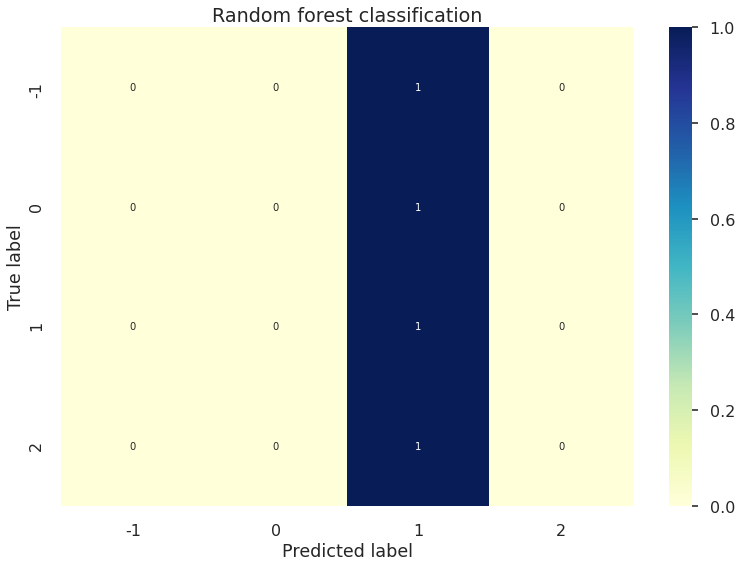

In [27]:
# Output Classification Report, Random Forest

print(metrics.classification_report(y_valid, y_pred_rf))

# Normalized Confusion Matrix

cm = confusion_matrix(y_valid, y_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display as a Heatmap

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=rf.classes_, 
            yticklabels=rf.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Random forest classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Visualise the Output from Naive Bayes Model

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       1.00      0.05      0.09       547
           1       0.60      0.99      0.75      2178
           2       0.94      0.33      0.48       894

    accuracy                           0.63      3955
   macro avg       0.63      0.34      0.33      3955
weighted avg       0.68      0.63      0.53      3955



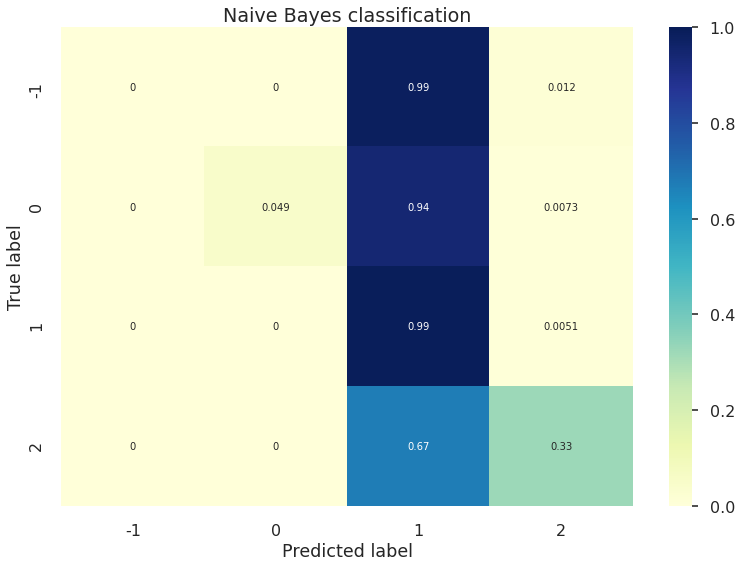

In [28]:
# Classification Report for the Naive Bayes model

print(metrics.classification_report(y_valid, y_pred_nb))

# Normalized Confusion Matrix

cm = confusion_matrix(y_valid, y_pred_nb)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display Heatmap

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=nb.classes_, 
            yticklabels=nb.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

plt.title('Naive Bayes classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Visualise Linear SVC Model

              precision    recall  f1-score   support

          -1       0.63      0.57      0.60       336
           0       0.57      0.49      0.53       547
           1       0.82      0.80      0.81      2178
           2       0.71      0.84      0.77       894

    accuracy                           0.75      3955
   macro avg       0.68      0.68      0.68      3955
weighted avg       0.74      0.75      0.74      3955



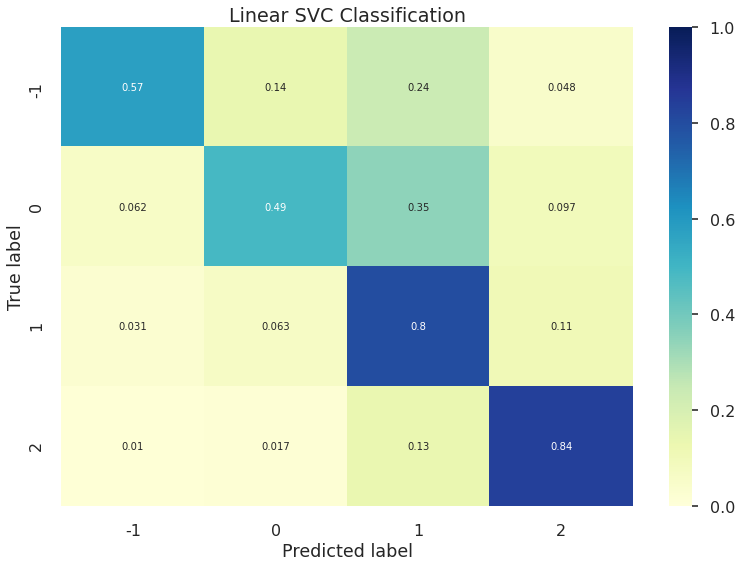

In [29]:
# Generate Linear SVC Model

print(metrics.classification_report(y_valid, y_pred_lsvc))

# Generate Confusion Matrix

cm = confusion_matrix(y_valid, y_pred_lsvc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Heatmap

sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=lsvc.classes_, 
            yticklabels=lsvc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

plt.title('Linear SVC Classification')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# The Linear SVC Model produced the highest F1 Score of the 3 models sullected at 0.74
# As a result, Linear SVC Model will be used in the Kaggle Submission and the other models disgarded.


# Hyperparameter - Tuning on the Linear Model to assist in improving the F1 score
* Retrain Linear SVC using Hyperparameter:

In [30]:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_valid)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), 
      '%')

F1 score improved by 2.0 %


## Creating an output csv for submission

In [31]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)

KeyError: "['sentiment'] not in index"

In [32]:
y_test = lsvc_op.predict(test['message'])
output = pd.DataFrame({'tweetid': test.tweetid,
                       'sentiment': y_test})
output.to_csv('testsubmission.csv', index=False)
# End of Code and Submitted to Kaggle LeaderBoard
